In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Load Dataset
df = pd.read_csv("/content/Dataset09-Employee-salary-prediction.csv")


In [7]:
# Display first few rows
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
# Check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [9]:
# Handle missing values
df_cleaned = df.dropna().copy()

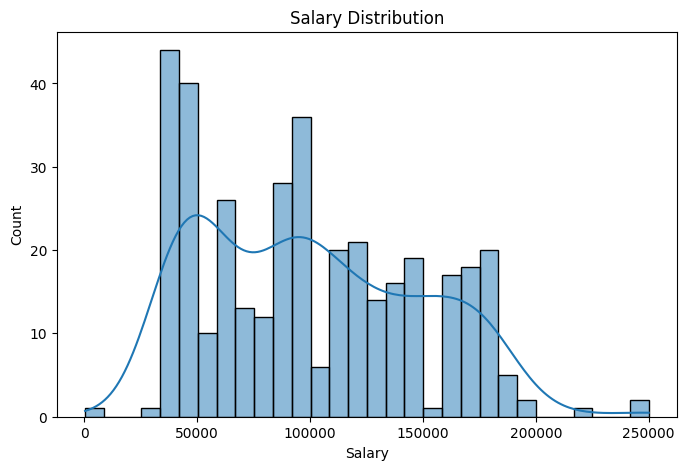

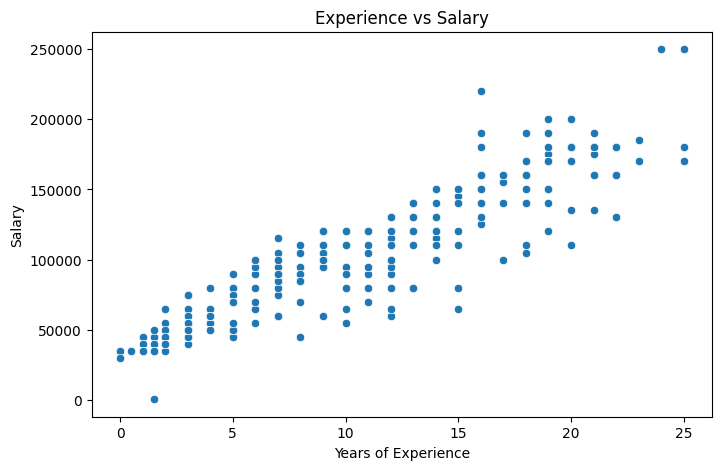

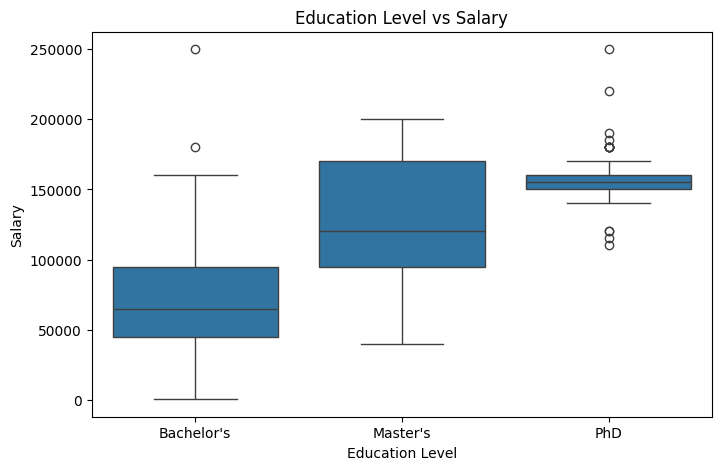

In [10]:
# Drop 'Gender' column if it exists
if 'Gender' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['Gender'])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned['Years of Experience'], y=df_cleaned['Salary'])
plt.title("Experience vs Salary")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['Education Level'], y=df_cleaned['Salary'])
plt.title("Education Level vs Salary")
plt.show()


In [11]:
# Encode Categorical Data Safely
label_encoders = {}
for column in ['Education Level', 'Job Title']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])  # Now safe, as df_cleaned is a copy
    label_encoders[column] = le

# Ensure 'Years of Experience' is treated as numerical
df_cleaned['Years of Experience'] = pd.to_numeric(df_cleaned['Years of Experience'], errors='coerce')

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=['Salary'])  # Ensure 'Gender' is not present
y = df_cleaned['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FINAL CHECK: Make sure X_train and X_test contain only numerical data
print(X_train.dtypes)


Age                    float64
Education Level          int64
Job Title                int64
Years of Experience    float64
dtype: object


In [12]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [13]:

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [14]:
# Evaluate Models
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R2 Score: {r2_rf}")

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R2 Score: {r2_lr}")


Random Forest - MAE: 8882.710682539682, MSE: 156670271.80093592, R2 Score: 0.9346548909360345
Linear Regression - MAE: 11711.126787150446, MSE: 283779365.24025434, R2 Score: 0.8816393604315139


In [15]:
# Test Example
sample_input = X_test.iloc[[7]]  # Selecting one test case
actual_salary = y_test.iloc[7]
predicted_salary_rf = rf_model.predict(sample_input)[0]
print(f"Actual Salary: {actual_salary}, Predicted Salary (RF): {predicted_salary_rf}")


Actual Salary: 120000.0, Predicted Salary (RF): 107300.0


In [23]:

# Function to predict salary for a new employee
def predict_salary(education, job_title, experience, age):
    input_data = pd.DataFrame([[age, education, job_title, experience]],
                              columns=["Age", "Education Level", "Job Title", "Years of Experience"])

    # Encode categorical values
    for col in ['Education Level', 'Job Title']:
        input_data[col] = label_encoders[col].transform(input_data[col])

    # Predict salary using Random Forest
    predicted_salary = rf_model.predict(input_data)[0]
    return f"Predicted Salary: ${predicted_salary:.2f}"

# Example prediction using the function
print(predict_salary("Master's", "Software Engineer", 5, 30))

Predicted Salary: $71350.00
